In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)
%matplotlib inline
df = pd.read_csv('hw2data.csv')

b) Set to be the y variable in the dataframe from a and X to be the remaining features.

In [2]:
y = df['y']
X = df.drop(['y'],1)

In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,0.895260,1.374964,-1.332212,-1.968625,-0.660056,0.175819,0.498690,1.047972,0.284280,1.742669,-0.222606,-0.913079,-1.681218,-0.888971,0.242118,-0.888720,0.936742,1.412328,-2.369587,0.864052,-2.239604,0.401499,1.224871,0.064856,-1.279689,-0.585431,-0.261645,-0.182245,-0.202897,-0.109883,0.213480,-1.208574,-0.242020,1.518261,-0.384645,-0.443836,1.078197,-2.559185,1.181379,-0.631904,0.163929,0.096321,0.942468,-0.267595,-0.678026,1.297846,-2.364174,0.020334,-1.347925,-0.761573,2.011257,-0.044595,0.195070,-1.781563,-0.729045,0.196557,0.354758,0.616887,0.008628,0.527004,0.453782,-1.829740,0.037006,0.767902,0.589880,-0.363859,-0.805627,-1.118312,-0.131054,1.133080,-1.951804,-0.659892,-1.139802,0.784958,-0.554310,-0.470638,-0.216950,0.445393,-0.392389,-3.046143,0.543312,0.439043,-0.219541,-1.084037,0.351780,0.379236,-0.470033,-0.216731,-0.930157,-0.178589,-1.550429,0.417319,-0.944368,0.238103,-1.405963,-0.590058,-0.110489,-1.660700,0.115148,-0.379148,-1.742356,-1.303243,0.605120,0.895556,-0.131909,0.404762,0.223844,0.329623,1.285984,-1.506998,0.676461,-0.382009,-0.224259,-0.302250,-0.375147,-1.226196,0.183339,1.670943,-0.056133,-0.001385,-0.687299,-0.117475,0.466166,-0.370242,-0.453804,0.403265,-0.918005,0.252497,0.820322,1.359949,-0.090382,1.367597,1.034410,-0.996213,-1.217939,-0.304964,1.028935,-0.072287,-0.600658,1.552243,0.286904,-2.320594,0.317161,0.520041,0.225609,0.449712,-0.067276,-1.318396,-0.370704,-0.945616,-0.932741,-1.263068,0.452489,0.097896,-0.448165,-0.649338,-0.023423,1.079195,-2.004216,0.376877,-0.545712,-1.884586,-1.945703,-0.912783,0.219510,0.393063,-0.938982,1.017021,1.422983,0.396087,-0.591403,1.124419,0.755396,0.867407,-0.656464,-2.834555,2.116791,-1.610878,-0.035768,2.380745,0.330577,0.949246,-1.502397,-1.777667,-0.532703,1.090750,-0.346249,-0.794636,0.197967,1.081935,-1.444940,-1.210543,-0.788669,1.094638,0.234822,2.132153,0.936446,-0.035095,1.265078,0.211497,-0.704921,0.679975,-0.696327,-0.290397,1.327783,-0.101281,-0.803141,-0.464338,1.021791,-0.552541,-0.38

In [4]:
X.shape

(225, 500)

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

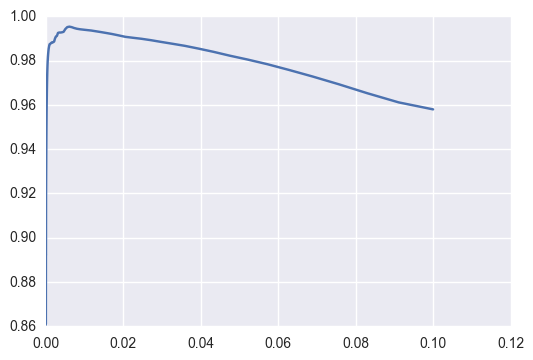

In [7]:
alphas = np.logspace(-5, -1, 100)# 0.01 variance

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
# Method 2 (this is better since it randomizes as well):

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
train_errors=[]
test_errors=[]
coeffs=[]
scores=[]
for alpha in alphas:
    regr = Lasso(alpha=alpha)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
    coeffs.append(regr.coef_)
plt.plot(alphas,scores)
test_errors=scores
alpha_optim=alphas[np.argmax(scores)]

In [8]:
alpha_best = alpha_optim

d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. 

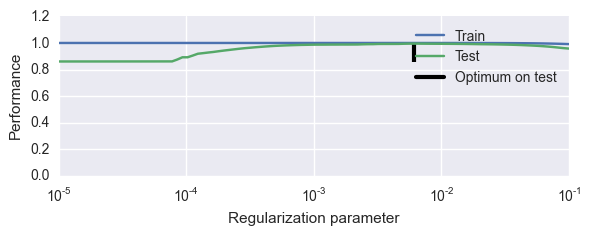

In [9]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

e) Plot the top coefficients. Why do you think so many are zero? 

In [434]:
alpha_best = alpha_ridge[np.argmax(scores)]

In [66]:
regr = Lasso(alpha=alpha_best)
regr.fit(X_train, y_train)
regr.coef_

array([  1.75905199e+00,   3.97865181e-01,   9.73417716e-01,
         2.23622432e+00,   1.86425673e+00,  -9.72778246e-01,
         9.49990291e-01,  -1.51400330e-01,  -9.87554115e-02,
         4.09044524e-01,   1.45407722e-01,   1.44820827e+00,
         7.59067450e-01,   1.17806302e-01,   4.39989637e-01,
         3.30083382e-01,   1.49469710e+00,  -2.07045287e-01,
         3.10923327e-01,  -8.52216218e-01,  -2.55232724e+00,
         6.51107276e-01,   8.62685882e-01,  -7.40555297e-01,
         2.26474485e+00,  -1.44753568e+00,   4.08195708e-02,
        -1.87292989e-01,   1.53067617e+00,   1.46172253e+00,
         1.56279445e-01,   3.76588975e-01,  -8.80864555e-01,
        -1.98195943e+00,  -3.40964815e-01,   1.53138886e-01,
         1.22504803e+00,   1.20010525e+00,  -3.85427197e-01,
        -2.98981881e-01,  -1.04267393e+00,  -1.41666995e+00,
        -1.70294372e+00,   1.94935065e+00,  -5.05423782e-01,
        -4.37450799e-01,  -1.24838115e+00,   7.74684861e-01,
        -1.61105252e+00,

In [67]:
df = pd.DataFrame({'coefficient-name':range(len(regr.coef_)), 'value':regr.coef_})

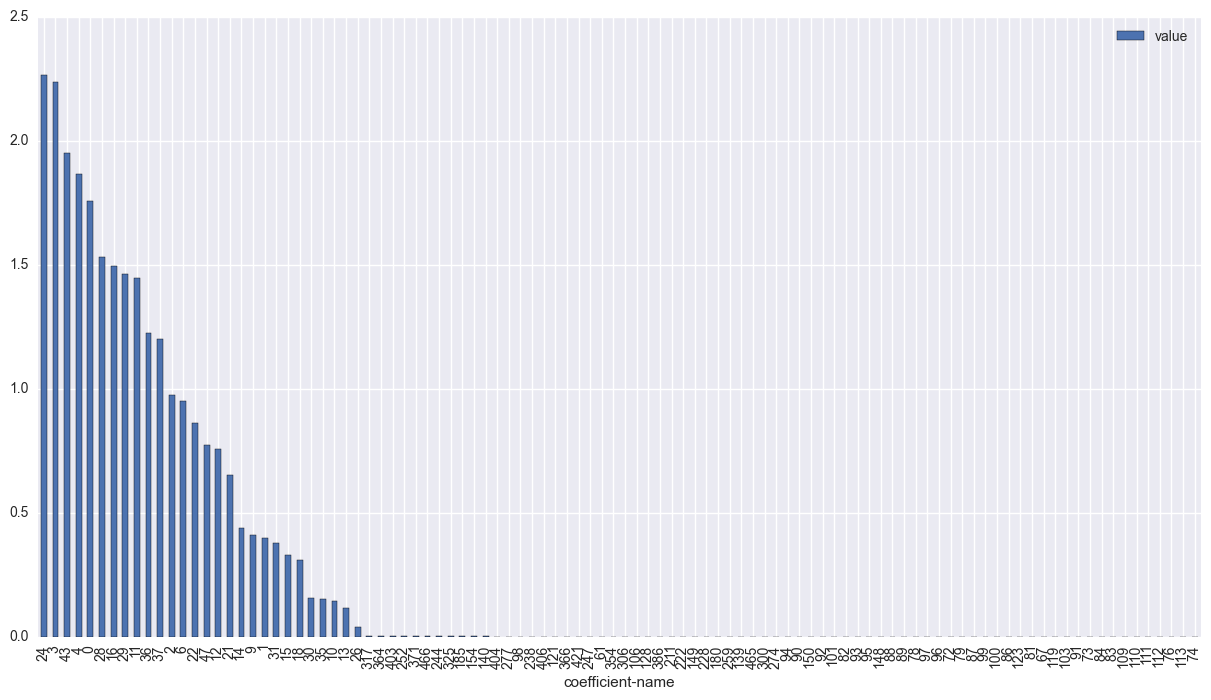

In [71]:

df = df.sort(['value'])[::-1]
df[0:100].plot(x='coefficient-name',y='value',kind='bar',figsize=(15,8))

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

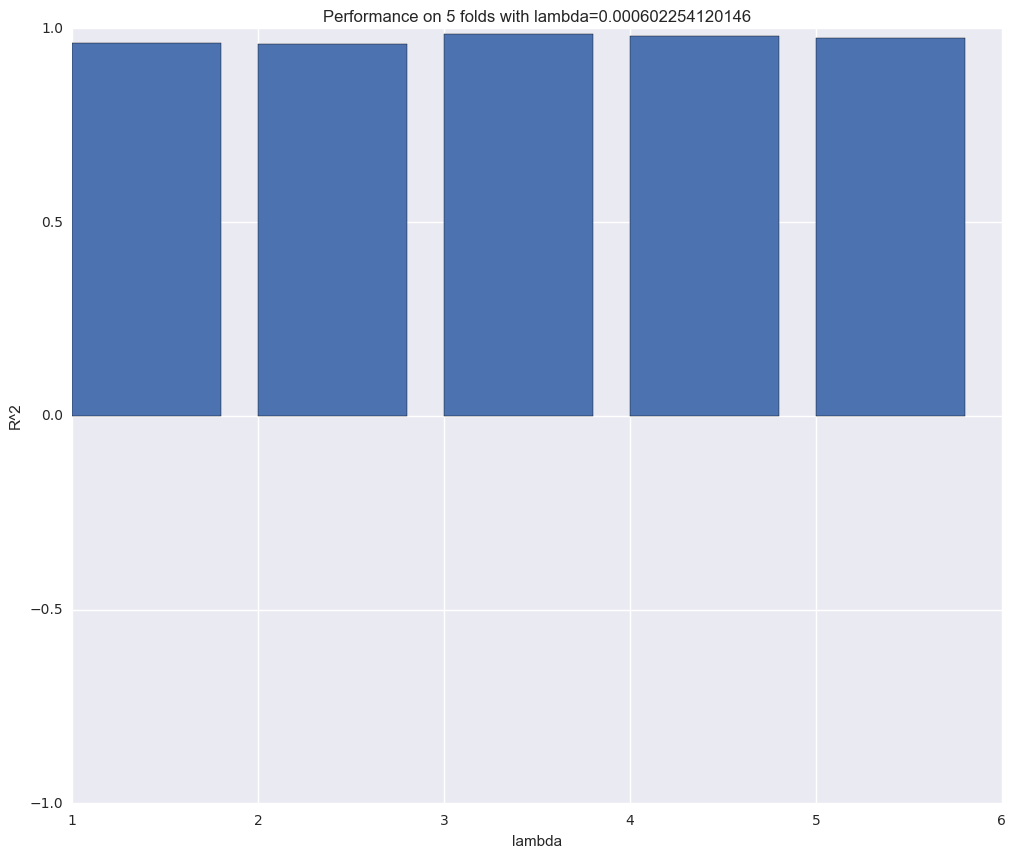

In [446]:
from sklearn.model_selection import cross_val_score

regr = Lasso(alpha=alpha_best)
scores = cross_val_score(regr, X, y, cv=5)
plt.ylim([-1,1])
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with lambda=' + str(alpha))
plt.bar(range(1,6),scores)
plt.show()

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [58]:
from sklearn.cross_validation import KFold
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X2 = X.as_matrix().astype(np.float)
X2 = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X2,np.array(y),Lasso,alpha=alpha_best)

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

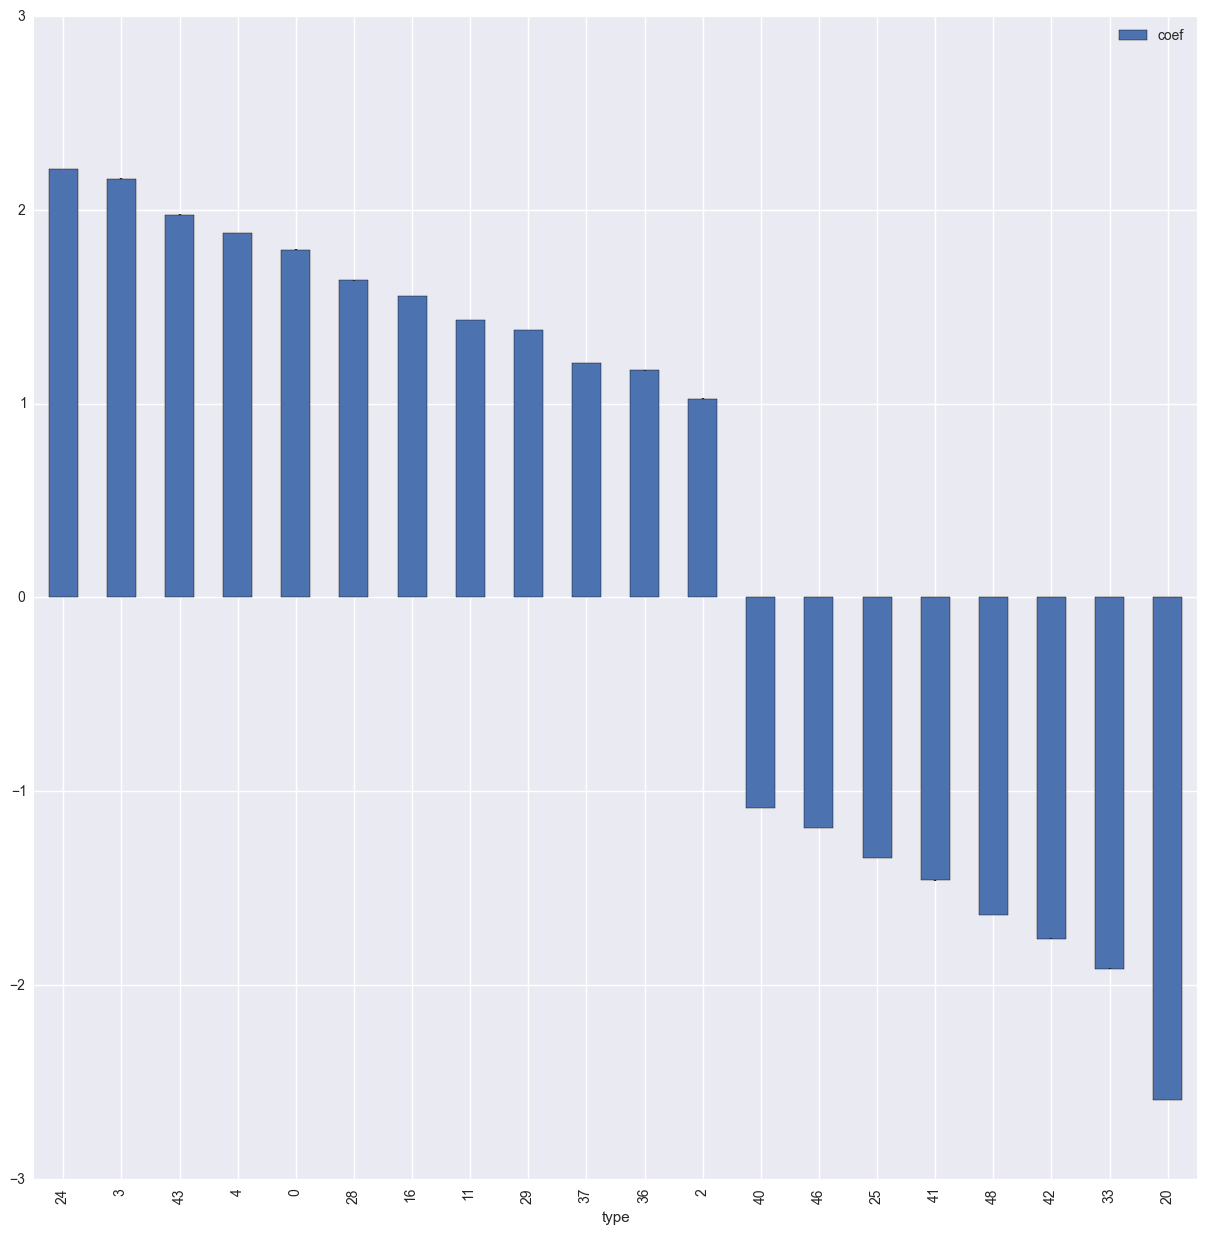

In [61]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))